In [168]:
%reset -f

import pandas as pd

data_folder= "/home/m3m/INFO_PROYECTO/drexml_paper_paquete/results/Fanconi_Anemia/results"

# Read the .tsv files into a DataFrames
shap_values = pd.read_csv(f"{data_folder}/shap_summary_symbol.tsv", sep='\t', index_col=0)
shap_selection = pd.read_csv(f"{data_folder}/shap_selection_symbol.tsv", sep='\t', index_col=0)
stability = pd.read_csv(f"{data_folder}/stability_results_symbol.tsv", sep='\t', index_col=0) 



In [169]:
# Define min and max range for normalization
min_range = -1
max_range = 1

# Apply Min-Max normalization to each row
shap_normalized = shap_values.copy()
shap_normalized.iloc[:,1:] = shap_normalized.iloc[:,1:].apply(lambda row: (row - row.min()) / (row.max() - row.min()) * (max_range - min_range) + min_range, axis=1)

shap_normalized.head()

,ABAT,ABCA1,ABL1,ACAT1,ACHE,ACLY,ACP3,ACTN1,ADA,ADH1A,...,TPH2,SYT2,TAAR1,VKORC1L1,TRPV3,TUBB,PCSK9,HCAR2,FFAR4,CKMT1A
circuit_name,,,,,,,,,,,,,,,,,,,,,
Fanconi anemia pathway: RAD51,-8.689657e-08,-0.386536,-0.401960,-0.396785,-0.521874,-0.378718,-0.300026,-0.379242,-0.389304,-0.389326,...,-0.388704,-0.389426,-0.388067,-0.384761,-0.384756,-0.357535,-0.372284,-0.359548,-0.365995,-0.403467
Fanconi anemia pathway: MLH1 PMS2,-8.077751e-08,-0.238399,-0.269825,-0.260549,-0.431095,-0.230148,-0.084805,-0.233656,-0.252828,-0.241303,...,-0.242601,-0.241099,-0.243983,-0.235437,-0.234357,-0.267757,-0.214188,-0.200782,-0.200288,-0.237795
Fanconi anemia pathway: RAD51C,-7.470089e-08,-0.414730,-0.440035,-0.430456,-0.632182,-0.405163,-0.326664,-0.404697,-0.420671,-0.419098,...,-0.418211,-0.415957,-0.417600,-0.409293,-0.412086,-0.394902,-0.401005,-0.384553,-0.369725,-0.432237
Fanconi anemia pathway: FANCI,-1.061490e-07,0.003305,0.027404,-0.015537,-0.526704,0.027307,0.162895,0.038285,0.005416,0.004532,...,0.009642,0.010136,0.007968,0.025313,0.013168,-0.008716,0.022125,0.047733,0.059667,-0.011232
Fanconi anemia pathway: BRCA1,-1.683542e-05,-0.301273,-0.283741,-0.310443,-0.621120,-0.270129,-0.226952,-0.287605,-0.293040,-0.300574,...,-0.298489,-0.299828,-0.297885,-0.286508,-0.294695,-0.219823,-0.307477,-0.282670,-0.263800,-0.323152


In [170]:
shap_filtered_norm = shap_normalized * shap_selection

filtered_df = shap_filtered_norm.loc[:, (shap_filtered_norm != 0).sum() != 0]

filtered_df.head()

filtered_df.to_csv(f"{data_folder}/shap_filtered_symbol.tsv", sep='\t', index=True)

In [171]:
# Now filter those circuits that have stability above the desired threshold
stability_06 = stability[stability['stability'] > 0.6]
stability_06.head()
stability_06.reset_index(inplace=True)

filtered_df.reset_index(inplace=True)

filtered_df_stable = filtered_df[filtered_df['circuit_name'].isin(stability_06['circuit_name'])]
filtered_df_stable.to_csv(f"{data_folder}/shap_filtered_above06_symbol.tsv", sep='\t', index=False)

print(filtered_df_stable)

                                        circuit_name      ACHE   ADORA2A  \
0                      Fanconi anemia pathway: RAD51 -0.521874 -0.000000   
2                     Fanconi anemia pathway: RAD51C -0.000000 -0.000000   
3                      Fanconi anemia pathway: FANCI -0.526704 -0.000000   
4                      Fanconi anemia pathway: BRCA1 -0.621120 -0.000000   
5             Fanconi anemia pathway: FANCM C19orf40 -0.644022 -0.457955   
6               Fanconi anemia pathway: FANCM STRA13 -0.690006 -0.546230   
8                 Cell cycle: SMC1B SMC3 STAG1 RAD21  0.000000  0.000000   
9                              Oocyte meiosis: REC8*  0.542976  0.508633   
10  Progesterone-mediated oocyte maturation: ANAPC10  0.000000  0.000000   

         AHR   SLC25A4     ANXA2     ANXA4  CACNB1    COL3A1      CPT2  ...  \
0  -0.000000 -0.563521 -0.241056 -0.000000 -0.0000 -0.000000 -0.000000  ...   
2  -0.000000 -0.000000 -0.000000 -0.000000 -0.0000 -0.000000 -0.000000  ...   
3 

In [153]:
# Set back the circuit_name column as index
# filtered_df.set_index("circuit_name", inplace=True)

# Load annotations of the most common drug-effects over the drug-targets
annots =pd.read_csv(f"/home/m3m/INFO_PROYECTO/drexml_paper_paquete/data/drugbank-v050110_mostdrugeffects_KDTs.tsv", sep='\t', index_col=0)

## Subset the relevant drug-targets
annots = annots.loc[annots.index.intersection(filtered_df_stable.columns),]

annots.head()

,drug_action
ACHE,Inhibitor
ADORA2A,Inhibitor
AHR,Activator
ANXA2,Activator
ANXA4,Activator


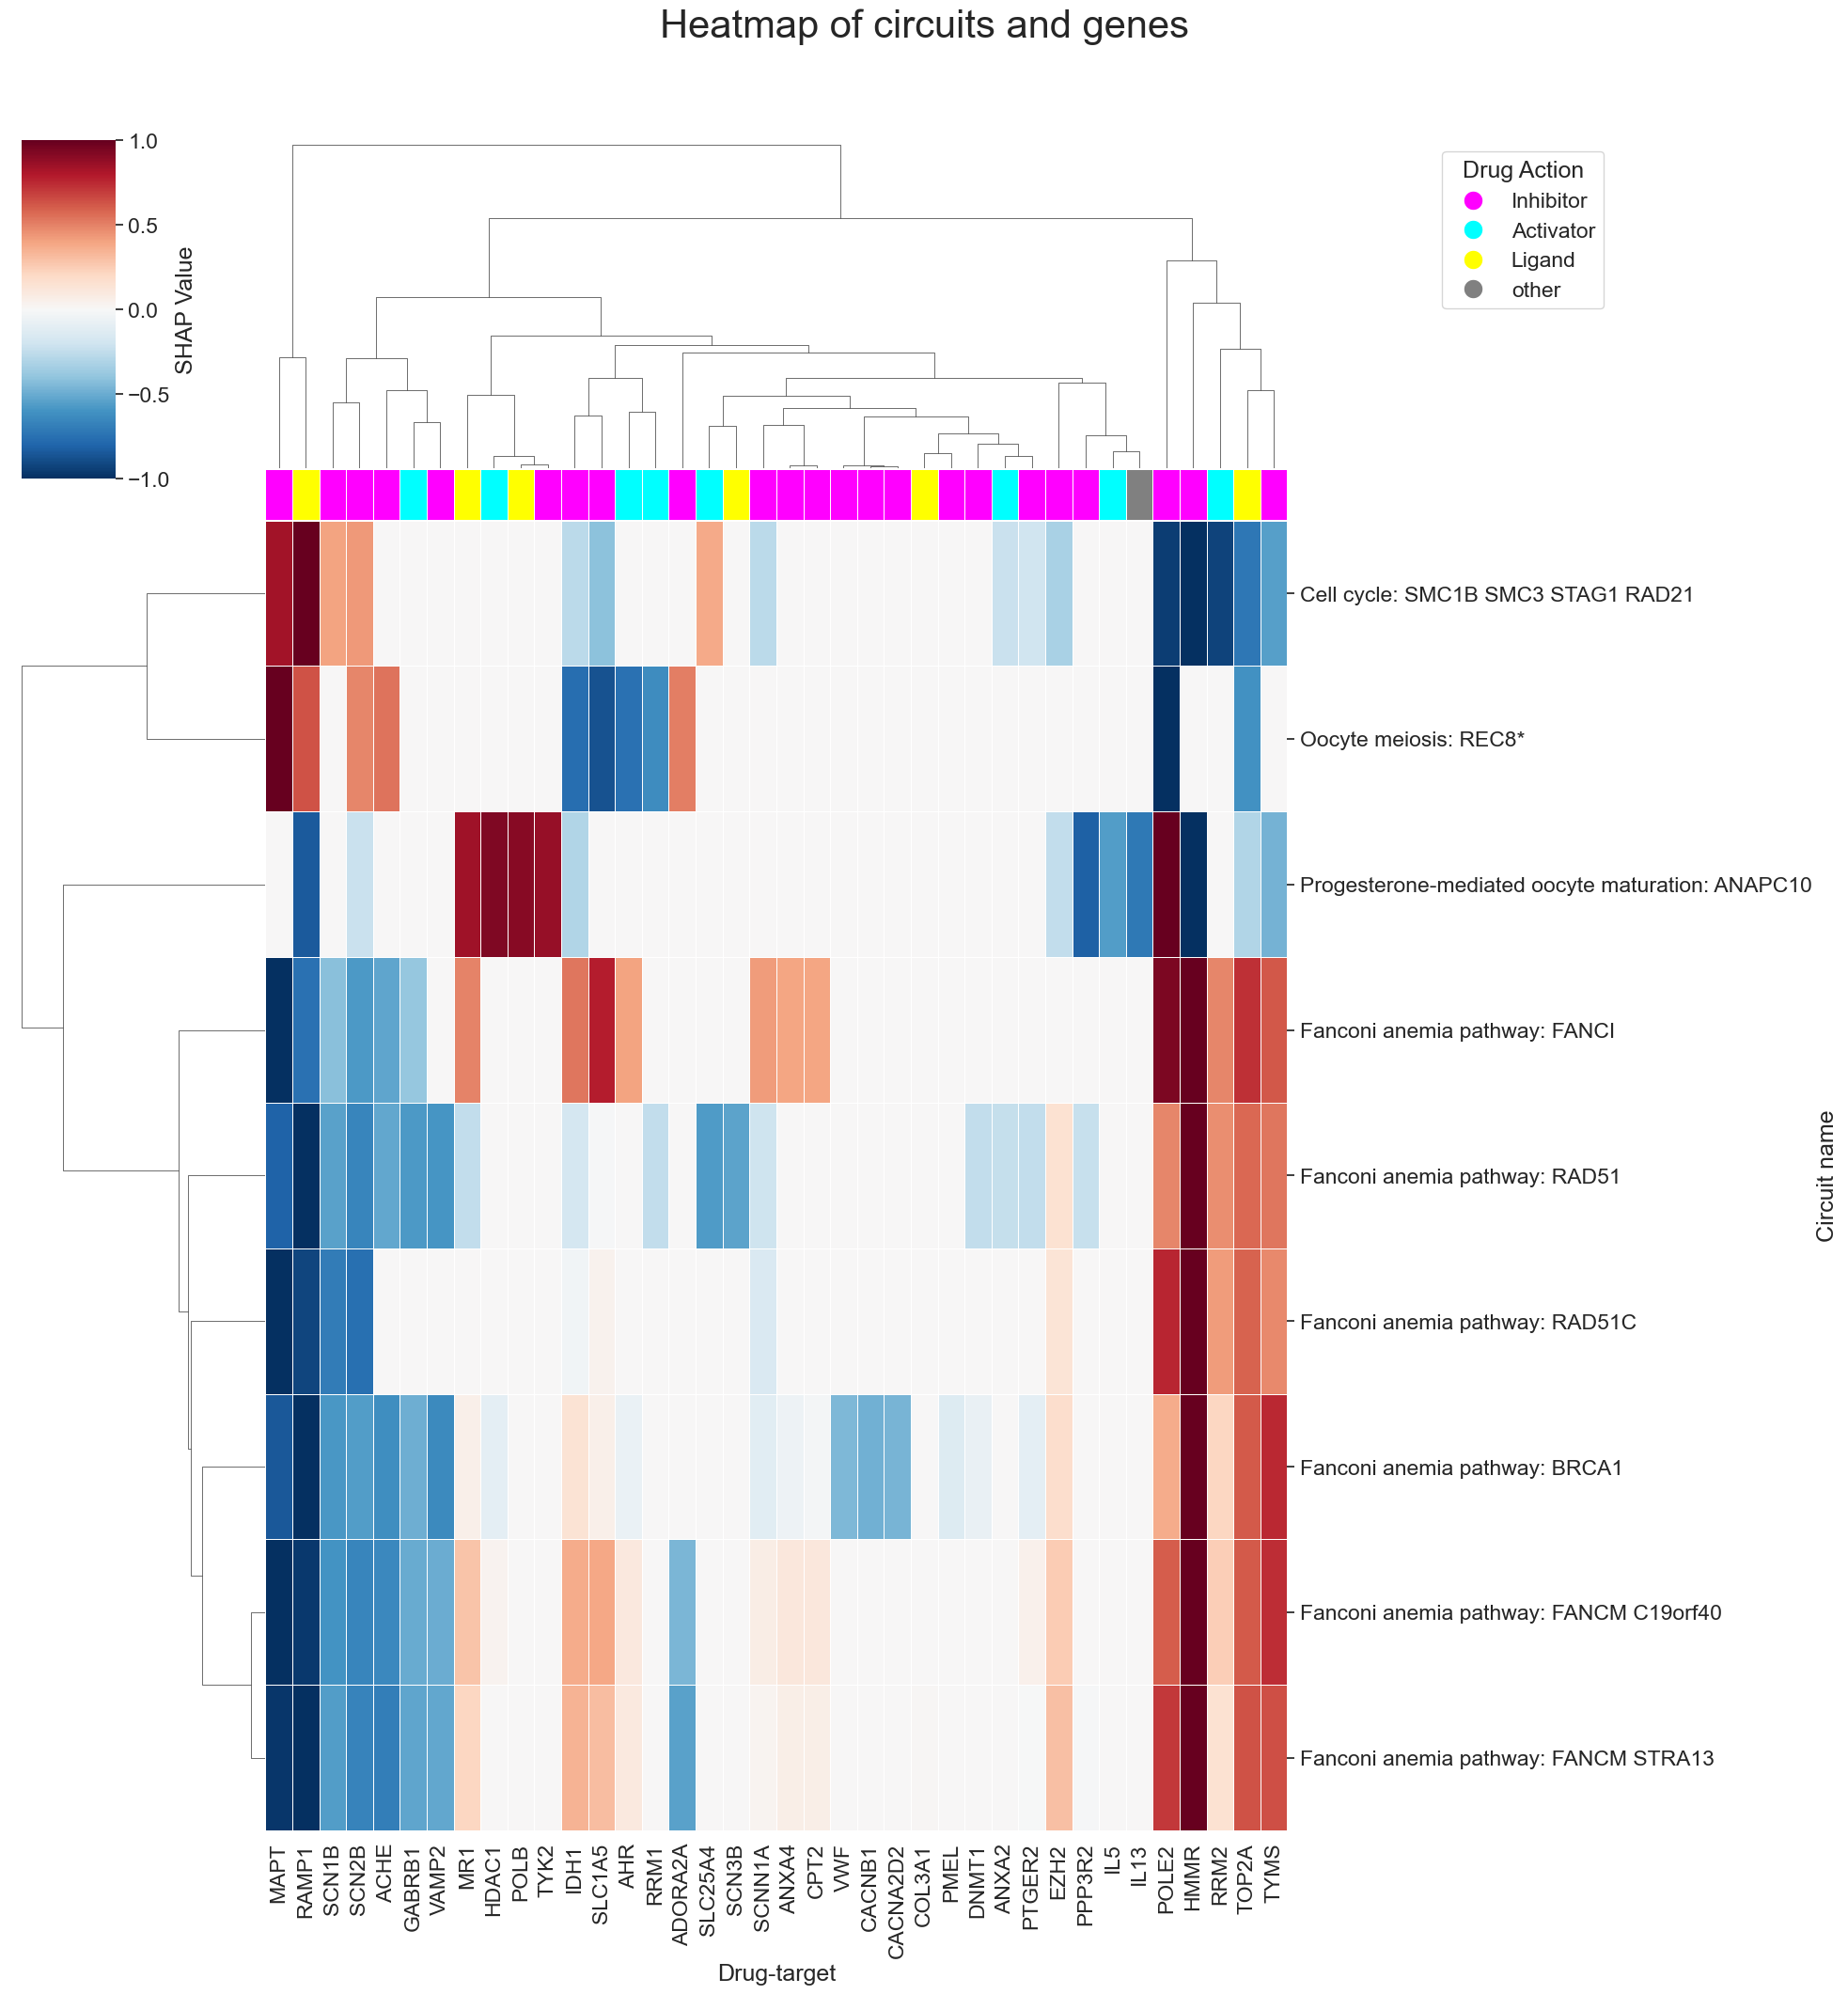

In [156]:
## CREATE THE HEATMAP FUNCTION ###
import seaborn as sns
import matplotlib.pyplot as plt

drug_action_colors = {
    "Inhibitor": "magenta",
    "Activator": "cyan",
    "Ligand": "yellow",
    "other": "grey",
}
drug_action_colors_list = [drug_action_colors[action] for action in annots["drug_action"]]

# Separate the circuit names from the data
filtered_df_stable.set_index("circuit_name", inplace=True)
circuit_names = filtered_df_stable.index
heatmap_data = filtered_df_stable

sns.set(font_scale= 1.5) # Adjust the font size if necessary

# Create the clustermap
cluster_map = sns.clustermap(heatmap_data, cmap="RdBu_r", col_colors=[drug_action_colors_list],linewidths=0.5, cbar_kws={'label': 'SHAP Value'}, figsize=(20,20))

# Add titles to the x and y axes
cluster_map.ax_heatmap.set_xlabel('Drug-target')
cluster_map.ax_heatmap.set_ylabel('Circuit name')


# Add a title to the color legend
ax = cluster_map.ax_col_colors
# ax.set_title("Drug Action", pad=10)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=action, markersize=15)
    for action, color in drug_action_colors.items()
]
legend = plt.legend(handles=legend_elements, title="Drug Action", loc='upper left', bbox_to_anchor=(15, 1))
legend.get_frame().set_facecolor('white')

# Add a title to the entire figure
plt.suptitle('Heatmap of circuits and genes', fontsize=30, y=1.05)

# Show the plot
plt.savefig(f"{data_folder}/heatmap_circuits_KDT_drugeff.pdf", dpi=300)
plt.show()

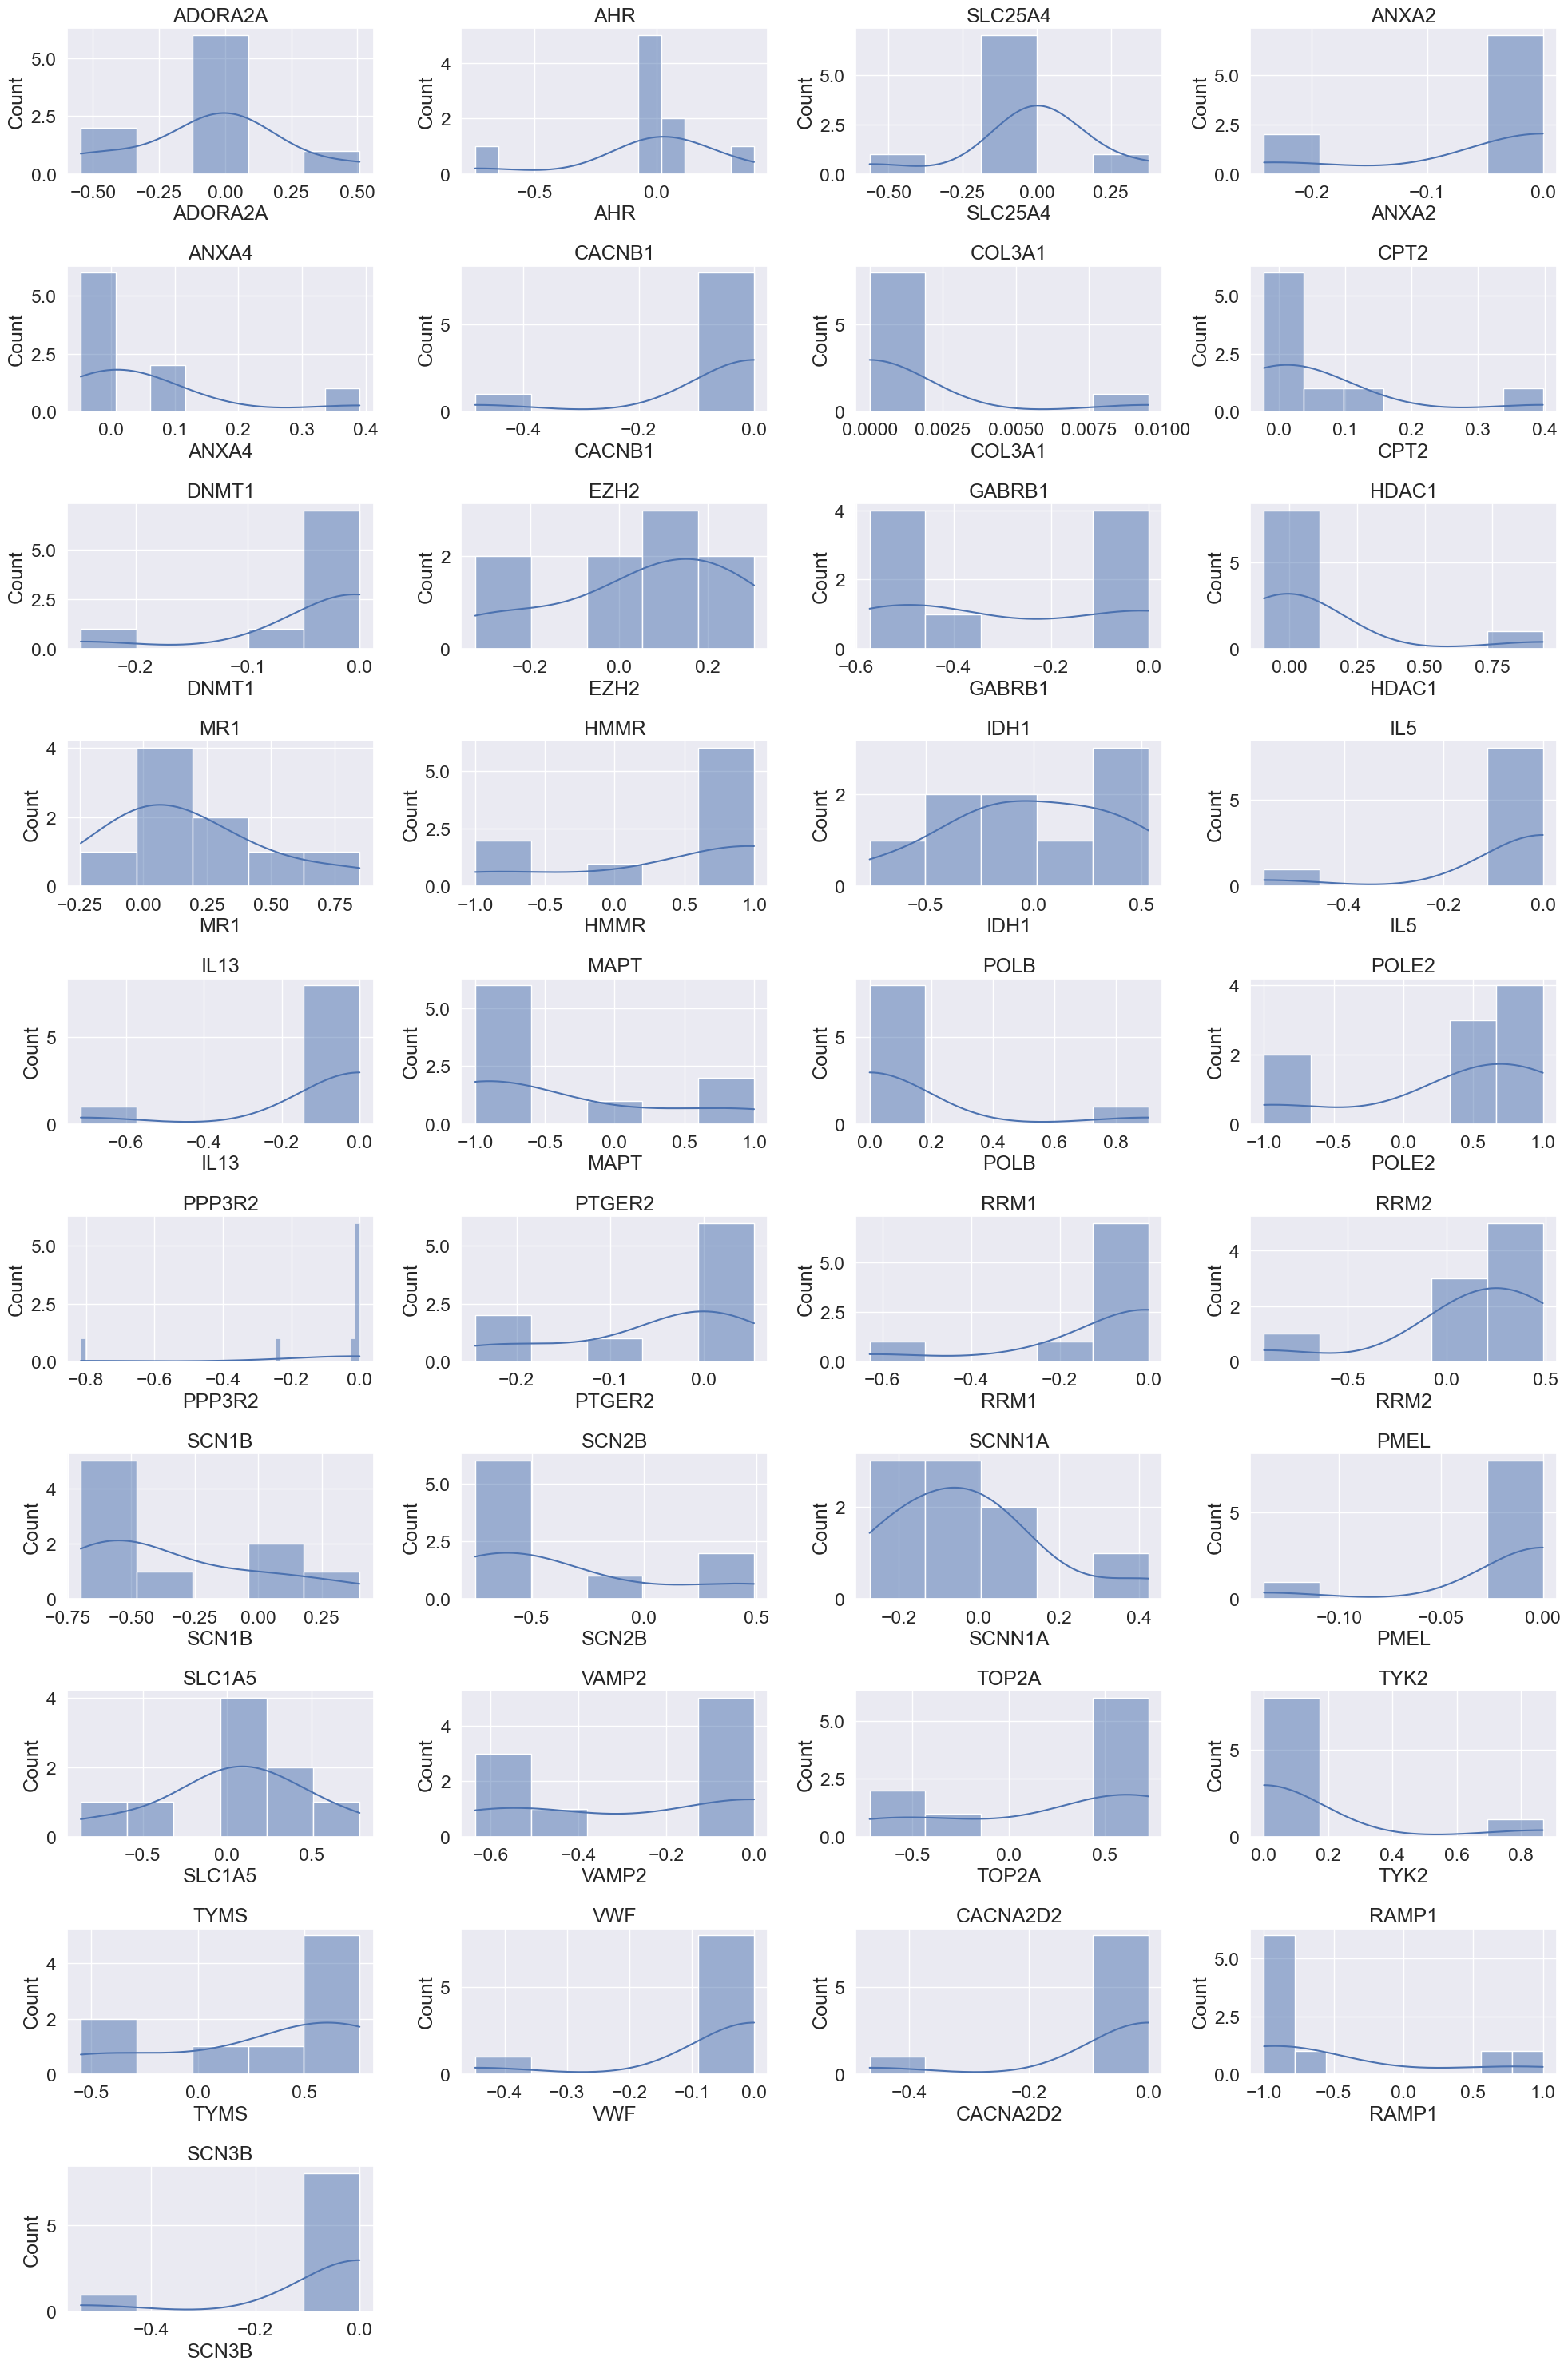

In [157]:
## Set the data and check different visualizations
data = filtered_df_stable

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(10, 4, figsize=(20, 30))

# Flatten the axes
axes = axes.flatten()

# Remove the extra subplots
for i in range(len(data.columns)-1, 40):
    fig.delaxes(axes[i])

# Create histograms for all score columns
for i, col in enumerate(data.columns[1:]):
    sns.histplot(data[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

# Improve layout
plt.tight_layout()
plt.savefig(f"{data_folder}/relevantDrugTargets_scores.pdf", dpi=300)
plt.show()

The box plot visualization represents the distribution of scores across all 38 features. Each box represents the interquartile range (IQR), the line within the box is the median, and the whiskers represent the range within 1.5 times the IQR from the first and third quartiles. Observations outside this range are considered outliers and are represented by individual points.

From the plot, we can observe that:

    The median of most features is at or near 0, consistent with our observation from the histograms.
    Many features have many outliers, both on the positive and negative sides.
    The range of scores varies between features. Some features have scores mostly concentrated around 0, while others have a      broader range.

In [158]:
data.head()

,ACHE,ADORA2A,AHR,SLC25A4,ANXA2,ANXA4,CACNB1,COL3A1,CPT2,DNMT1,...,PMEL,SLC1A5,VAMP2,TOP2A,TYK2,TYMS,VWF,CACNA2D2,RAMP1,SCN3B
circuit_name,,,,,,,,,,,,,,,,,,,,,
Fanconi anemia pathway: RAD51,-0.521874,-0.000000,-0.000000,-0.563521,-0.241056,-0.000000,-0.0000,-0.0,-0.000000,-0.248767,...,-0.000000,-0.013489,-0.588002,0.570760,-0.0,0.535007,-0.000000,-0.000000,-1.000000,-0.534459
Fanconi anemia pathway: RAD51C,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0000,-0.0,-0.000000,-0.000000,...,-0.000000,0.042820,-0.000000,0.587580,-0.0,0.477307,-0.000000,-0.000000,-0.917447,-0.000000
Fanconi anemia pathway: FANCI,-0.526704,-0.000000,0.401231,-0.000000,0.000000,0.390779,-0.0000,0.0,0.397596,0.000000,...,0.000000,0.787002,-0.000000,0.727428,-0.0,0.619025,-0.000000,0.000000,-0.749312,-0.000000
Fanconi anemia pathway: BRCA1,-0.621120,-0.000000,-0.064304,-0.000000,-0.000000,-0.047778,-0.4839,-0.0,-0.022072,-0.071079,...,-0.136791,0.055904,-0.635303,0.615792,-0.0,0.757284,-0.447168,-0.465851,-1.000000,-0.000000
Fanconi anemia pathway: FANCM C19orf40,-0.644022,-0.457955,0.108820,-0.000000,-0.000000,0.112910,-0.0000,0.0,0.112814,-0.000000,...,0.000000,0.389657,-0.493088,0.616645,-0.0,0.737936,-0.000000,-0.000000,-0.961777,-0.000000


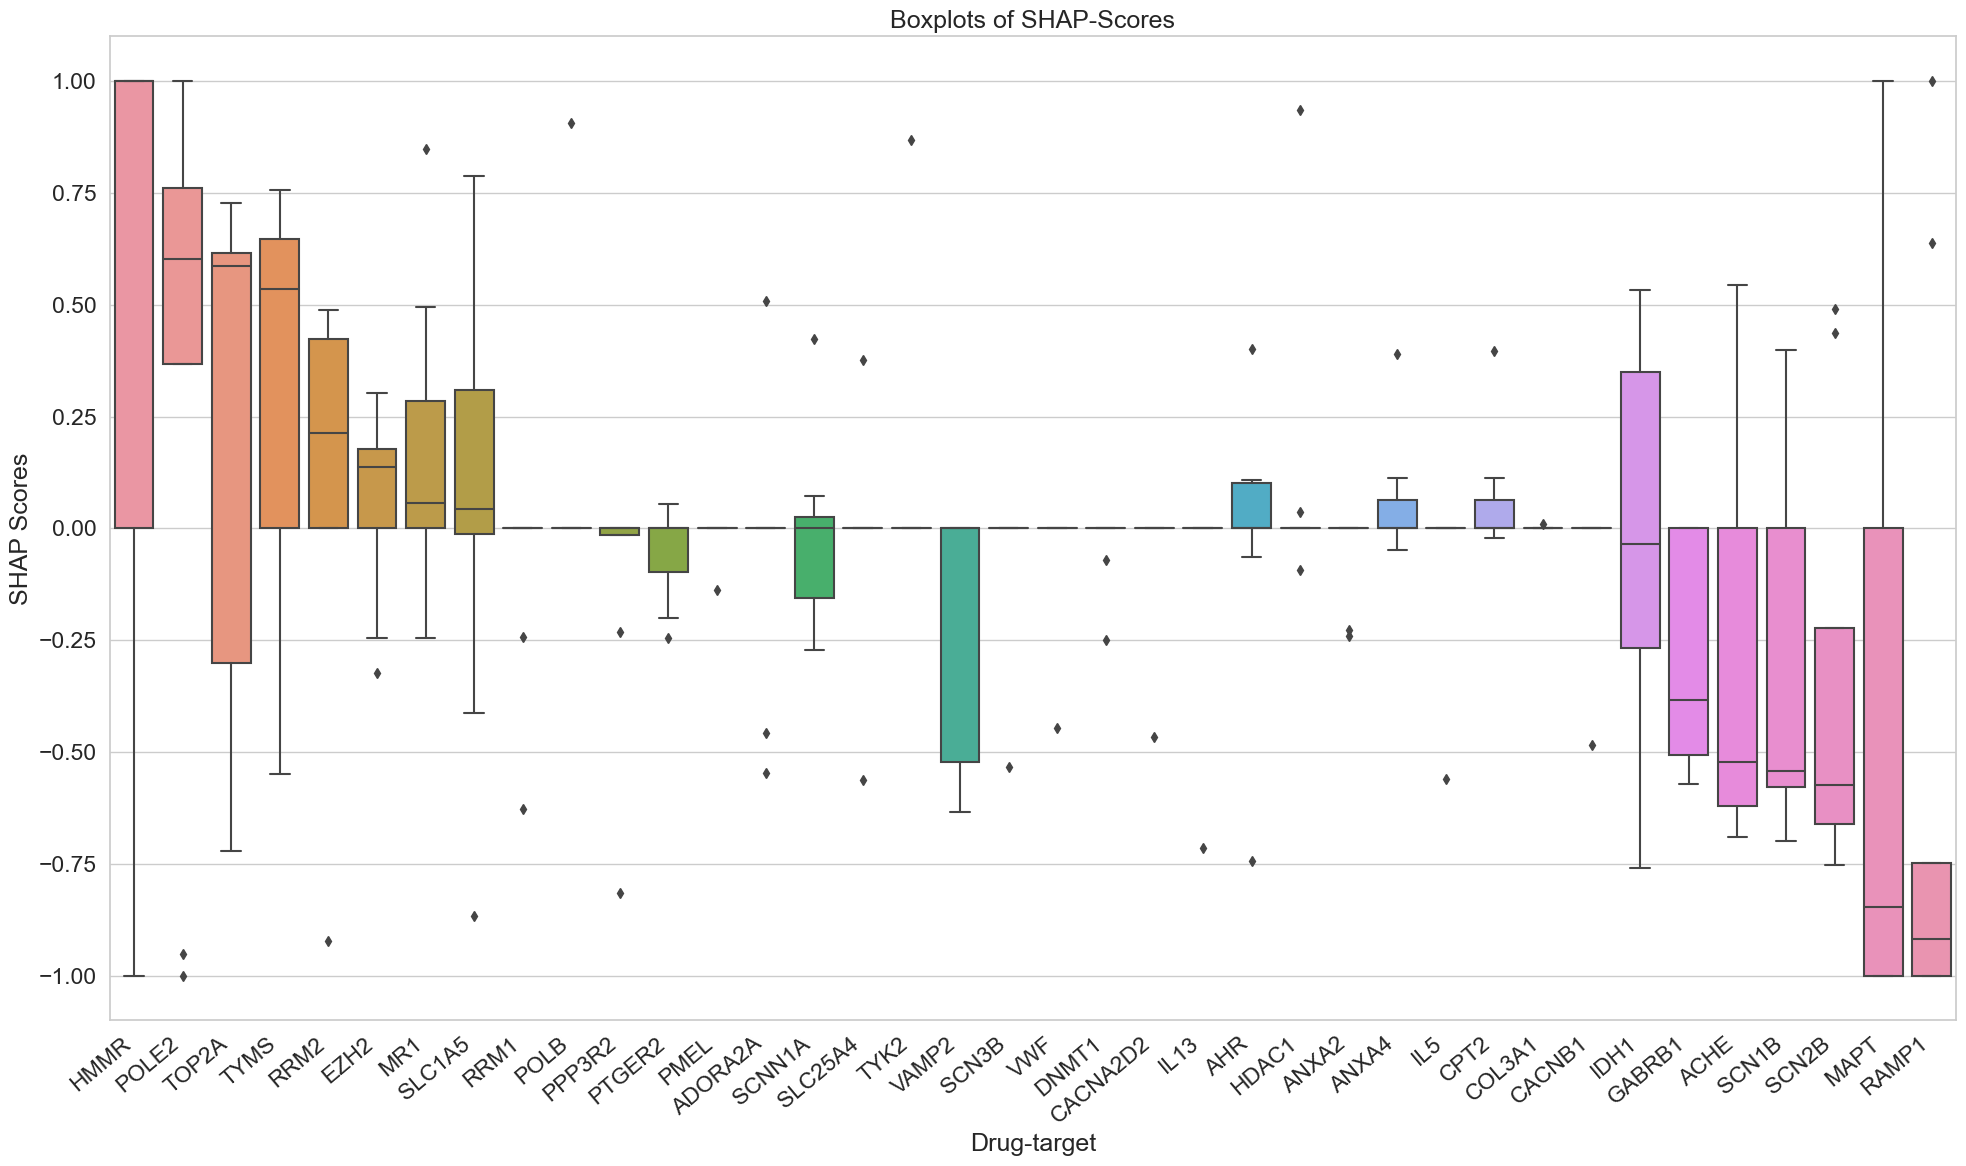

In [159]:
# Melt the DataFrame to make it suitable for boxplots
data.reset_index(inplace=True) ## Reset the index back to a column
melted_data = data.melt(id_vars = "circuit_name")

# Compute median of each column
medians = melted_data.groupby("variable")["value"].median().sort_values(ascending=False)

# Order the data based on medians
melted_data["variable"] = pd.Categorical(melted_data["variable"], categories=medians.index, ordered=True)

# Create the boxplots
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(20, 12), facecolor='white')
sns.set_style("whitegrid")  # set Seaborn style to white grid
sns.boxplot(x="variable", y="value", data = melted_data)
plt.xticks(rotation=40, ha = "right")
plt.title("Boxplots of SHAP-Scores")
plt.ylabel('SHAP Scores')
plt.xlabel('Drug-target')
plt.tight_layout()
plt.savefig(f"{data_folder}/relevant_drugTargetscores_boxplots.pdf", dpi=300)
plt.show()

In [160]:
### Now lets create a  heatmap with the drugs

# Load the new data
drugs = pd.read_csv("/home/m3m/INFO_PROYECTO/drexml_paper_paquete/data/drugbank-v050110_alldrugbyaction.tsv", sep='\t')

# List of genes in the initial dataset
genes = data.columns[1:].tolist()

# Filter the drugs dataset to keep only those rows where the gene is in our list
drugs_filtered = drugs[drugs['KDT_name'].isin(genes)]

# Display the first few rows of the filtered dataset
print(drugs_filtered)


                        drug drug_action    KDT  KDT_name Drug_effect  \
10               Neostigmine   inhibitor     43      ACHE   Inhibitor   
11            Pyridostigmine   inhibitor     43      ACHE   Inhibitor   
12               Edrophonium   inhibitor     43      ACHE   Inhibitor   
13                Demecarium   inhibitor     43      ACHE   Inhibitor   
14    Gallamine triethiodide   inhibitor     43      ACHE   Inhibitor   
...                      ...         ...    ...       ...         ...   
2570         Lonoctocog alfa      binder   7450       VWF      Ligand   
2571         Susoctocog alfa     binding   7450       VWF      Ligand   
2617              Isradipine   inhibitor   9254  CACNA2D2   Inhibitor   
2648             Pramlintide     agonist  10267     RAMP1   Activator   
2701              Zonisamide   inhibitor  55800     SCN3B   Inhibitor   

                       drugKDT  
10               Neostigmine43  
11            Pyridostigmine43  
12               Edropho

In [161]:
# Calculate the mean absolute score for each gene
mean_scores = data.drop(columns="circuit_name").abs().mean()

# Copy the DataFrame
drugs_filtered_scores = drugs_filtered.copy()

# Map the mean scores to the drugs that target each gene
drugs_filtered_scores['mean_score'] = drugs_filtered_scores['KDT_name'].map(mean_scores)

# Pivot the table to create a matrix of drugs and their mean scores for each gene
drug_gene_scores = drugs_filtered_scores.pivot_table(index='drug', columns='KDT_name', values='mean_score')

# Replace NaN values with 0
drug_gene_scores = drug_gene_scores.fillna(0)

# Display the first few rows of the dataset
drug_gene_scores.head()

drug_gene_scores.to_csv(f"{data_folder}/drug_KDT_scores.tsv", sep='\t', index=True)

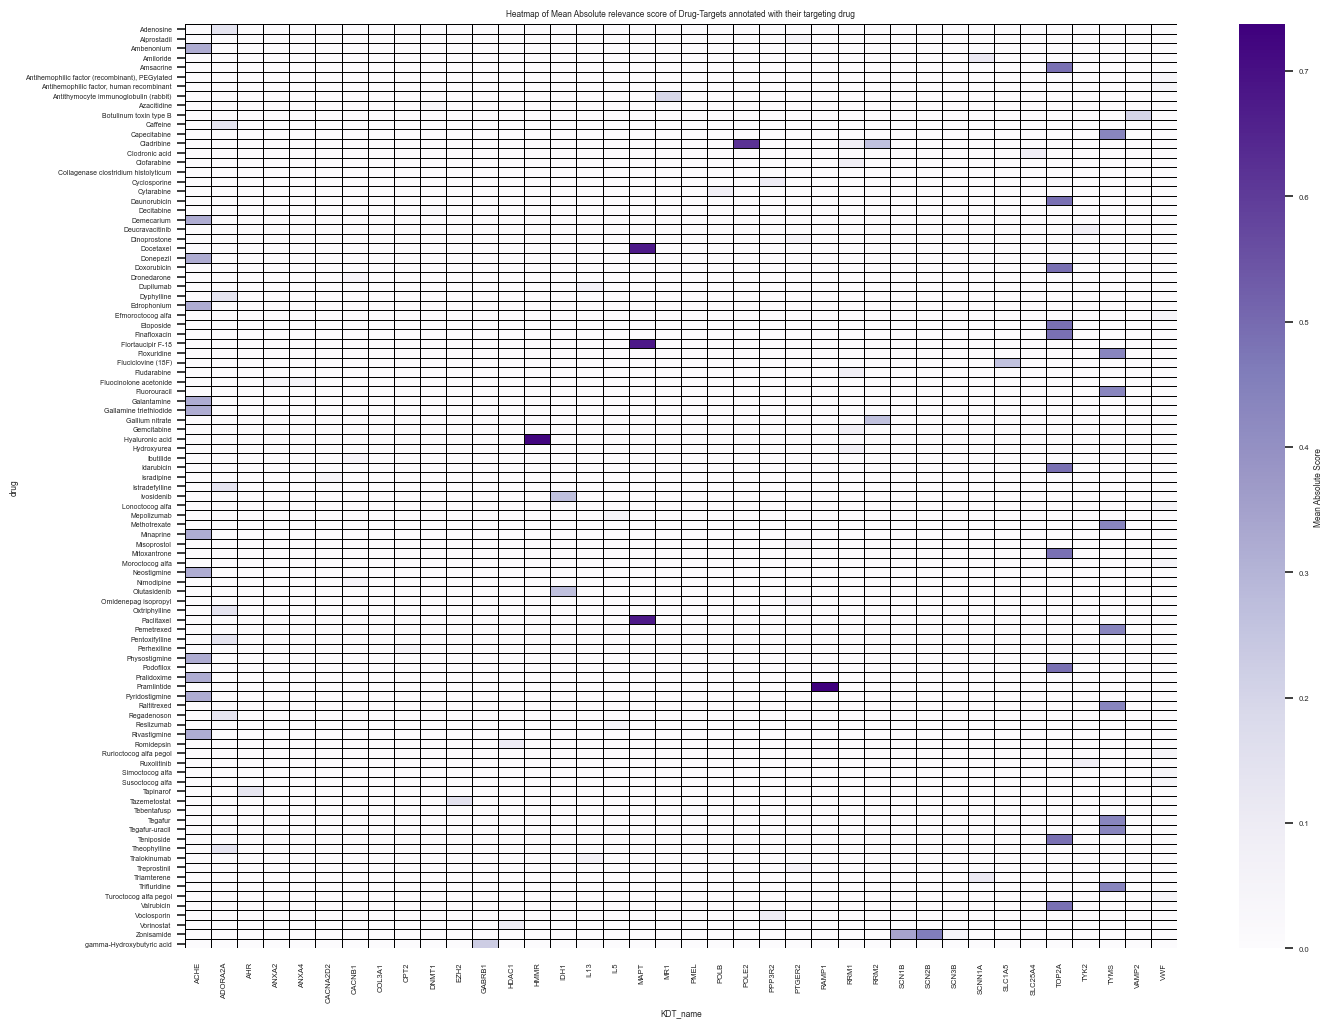

In [144]:
# Create a heatmap of the drug-gene scores
sns.set(font_scale= 0.5) # Adjust the font size if necessary

plt.figure(figsize=(16, 12))
ax = sns.heatmap(drug_gene_scores, cmap='Purples', linecolor='black', linewidths=0.5, cbar_kws={'label': 'Mean Absolute Score'})

# Set the yticks to each row and the yticklabels to the index of the DataFrame
ax.set_yticks([x + 0.5 for x in range(drug_gene_scores.shape[0])])  # shift the yticks by 0.5
ax.set_yticklabels(drug_gene_scores.index, size='small')

# Ensure that the ticks on the y-axis are visible
ax.yaxis.tick_left()

plt.title("Heatmap of Mean Absolute relevance score of Drug-Targets annotated with their targeting drug", size)
plt.xticks(rotation=90, ha = "center")
plt.savefig(f"{data_folder}/relevant_drugTargets_withdrugs.pdf", dpi=300)

plt.show()

In [162]:
# Filter the drugs dataset to keep only those rows where the gene is in our list
genes = data.columns[1:].tolist()
drugs_filtered = drugs[drugs['KDT_name'].isin(genes)]

# Create a DataFrame to hold the mean scores for each drug-circuit pair
drug_circuit_scores = pd.DataFrame(index=drugs_filtered['drug'].unique(), columns=data['circuit_name'].unique())

# Get the absolute scores for each circuit and gene
abs_scores = data.set_index("circuit_name").abs()

# Create a mapping from drug to genes
drug_genes = drugs_filtered.groupby('drug')['KDT_name'].apply(list).to_dict()

# Calculate the mean scores for each drug-circuit pair
for drug, genes in drug_genes.items():
    for circuit in drug_circuit_scores.columns:
        # Get the scores for the genes that are in both the drug's targets and the circuit
        scores = abs_scores.loc[circuit, genes]
        # Calculate the mean score
        drug_circuit_scores.loc[drug, circuit] = scores.mean()

# Convert the scores to floats
drug_circuit_scores = drug_circuit_scores.astype(float)

drug_circuit_scores.head()

,Fanconi anemia pathway: RAD51,Fanconi anemia pathway: RAD51C,Fanconi anemia pathway: FANCI,Fanconi anemia pathway: BRCA1,Fanconi anemia pathway: FANCM C19orf40,Fanconi anemia pathway: FANCM STRA13,Cell cycle: SMC1B SMC3 STAG1 RAD21,Oocyte meiosis: REC8*,Progesterone-mediated oocyte maturation: ANAPC10
Neostigmine,0.521874,0.0,0.526704,0.62112,0.644022,0.690006,0.0,0.542976,0.0
Pyridostigmine,0.521874,0.0,0.526704,0.62112,0.644022,0.690006,0.0,0.542976,0.0
Edrophonium,0.521874,0.0,0.526704,0.62112,0.644022,0.690006,0.0,0.542976,0.0
Demecarium,0.521874,0.0,0.526704,0.62112,0.644022,0.690006,0.0,0.542976,0.0
Gallamine triethiodide,0.521874,0.0,0.526704,0.62112,0.644022,0.690006,0.0,0.542976,0.0


In [165]:
print(drugs_filtered)

                        drug drug_action    KDT  KDT_name Drug_effect  \
10               Neostigmine   inhibitor     43      ACHE   Inhibitor   
11            Pyridostigmine   inhibitor     43      ACHE   Inhibitor   
12               Edrophonium   inhibitor     43      ACHE   Inhibitor   
13                Demecarium   inhibitor     43      ACHE   Inhibitor   
14    Gallamine triethiodide   inhibitor     43      ACHE   Inhibitor   
...                      ...         ...    ...       ...         ...   
2570         Lonoctocog alfa      binder   7450       VWF      Ligand   
2571         Susoctocog alfa     binding   7450       VWF      Ligand   
2617              Isradipine   inhibitor   9254  CACNA2D2   Inhibitor   
2648             Pramlintide     agonist  10267     RAMP1   Activator   
2701              Zonisamide   inhibitor  55800     SCN3B   Inhibitor   

                       drugKDT  
10               Neostigmine43  
11            Pyridostigmine43  
12               Edropho

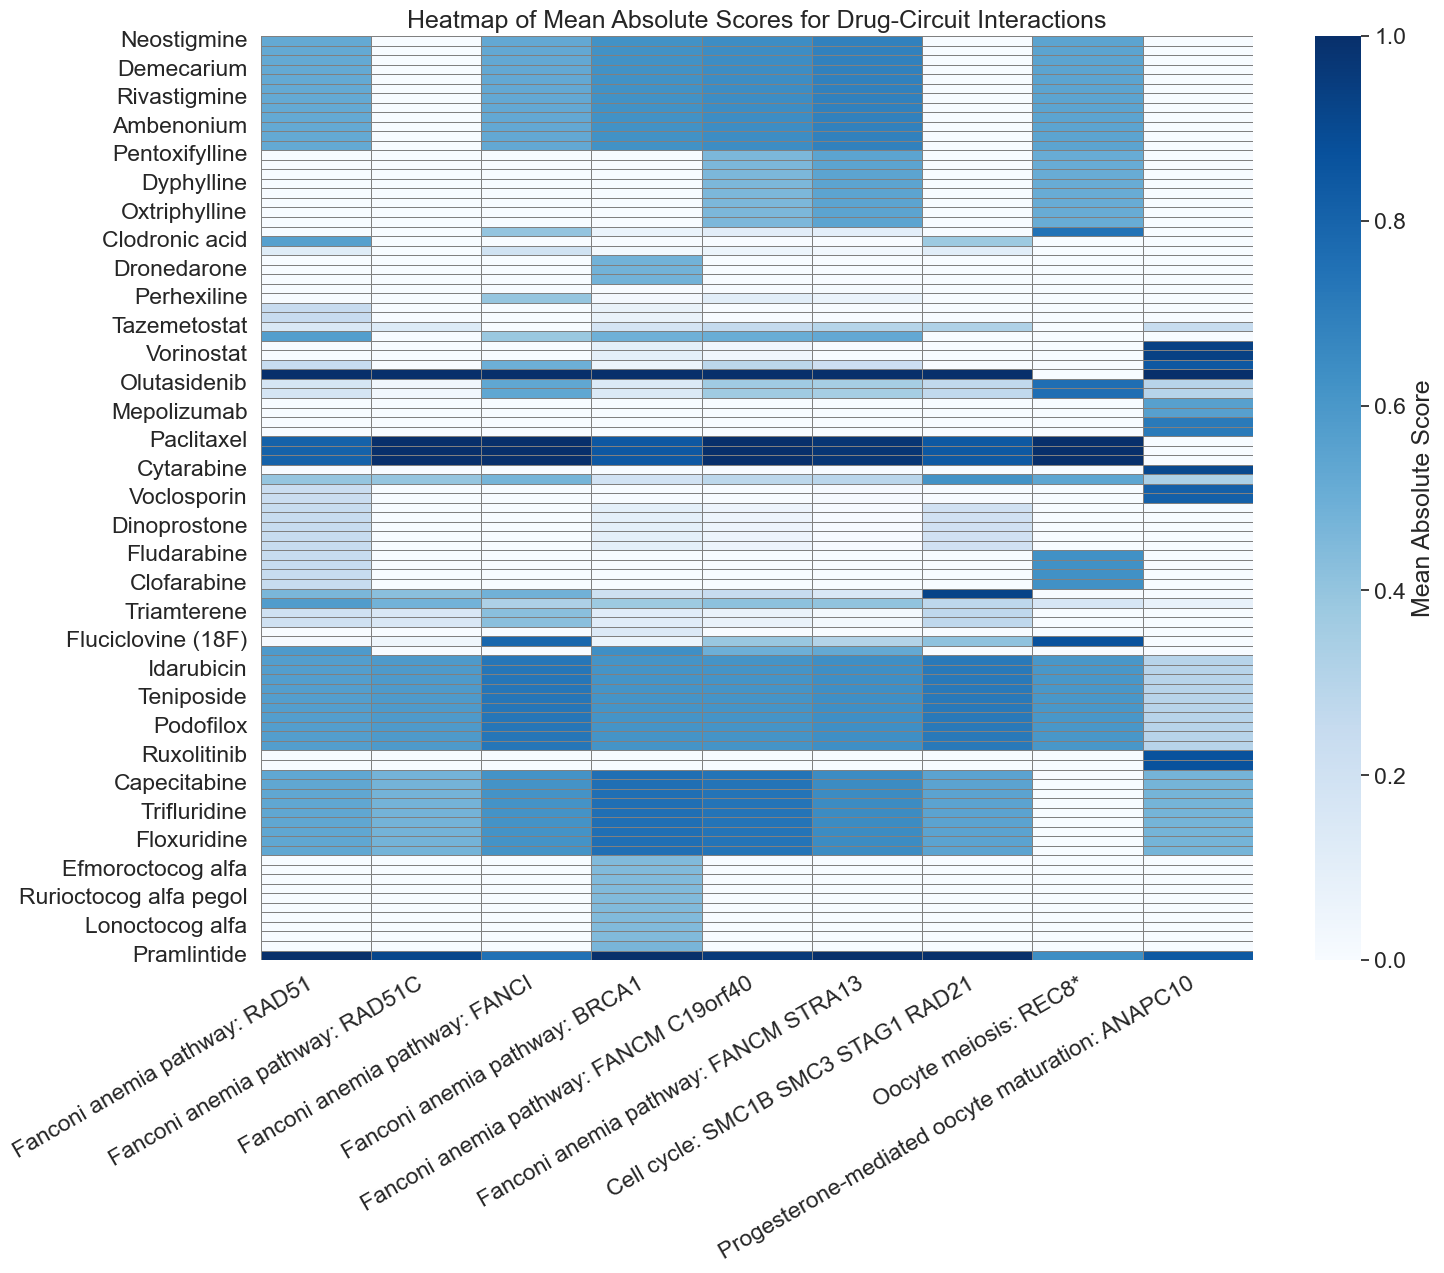

In [166]:
# Create the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(drug_circuit_scores, cmap='Blues', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Mean Absolute Score'})
plt.title("Heatmap of Mean Absolute Scores for Drug-Circuit Interactions")
plt.xticks(rotation=30, ha = "right")
plt.show()